In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl
import datetime as dt

C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages

In [2]:
biden_3_df = pd.read_csv("biden3_2020.csv")

C:\Users\mattd\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
biden_3_df.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1319790707977183232,1319713478781800449,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,19160112,buggmudd,Mary Connell,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '30354991', 'username': 'KamalaHar...",NaN,NaN,NaN,NaN
1,1319790707213766659,1319765955698774016,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,109722986,comeandtakeit19,⚠️ℕ𝕠𝕣𝕥𝕙𝕖𝕣𝕟 𝕡𝕒𝕥𝕣𝕚𝕠𝕥⚠️,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '165743715', 'username': 'taylor4a...",NaN,NaN,NaN,NaN
2,1319790707025039362,1319790457560379393,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1304672967360684033,nightmareamor,💀Antonio Nightmare ☠️,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}",NaN,NaN,NaN,NaN
3,1319790706425212928,1319781191420203010,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1319660809056866310,johnnylah2,Johnny Lah,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '813286', 'username': 'BarackObama'}",NaN,NaN,NaN,NaN
4,1319790704013529088,1319771753774641152,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1220092968327139329,bazinga79132539,Hanna Bates,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '259001548', 'username': 'kayleigh...",NaN,NaN,NaN,NaN


In [4]:
biden_3_df.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet            float64
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [5]:
biden_3_df.isnull().sum(axis = 0)

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                   24
place              347889
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet            347929
quote_url          316972
video                   0
thumbnail          303761
near               347929
geo                347929
source             347929
user_rt_id         347929
user_rt            347929
retweet_id         347929
reply_to                0
retweet_date       347929
translate          347929
trans_src          347929
trans_dest         347929
dtype: int64

In [6]:
biden_3_df.shape

(347929, 36)

In [7]:
columns = ["place", "retweet", "quote_url", "near", "geo", "source", "user_rt_id", "user_rt", "retweet_date", "retweet_id", "translate", "trans_src", "trans_dest"]

In [8]:
biden_3_df.drop(columns, axis=1, inplace=True)

In [9]:
biden_3_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to
0,1319790707977183232,1319713478781800449,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,19160112,buggmudd,Mary Connell,"@KamalaHarris @JoeBiden Shut down travel, sent...",...,[],0,0,0,[],[],https://twitter.com/buggmudd/status/1319790707...,0,NaN,"{'user_id': '30354991', 'username': 'KamalaHar..."
1,1319790707213766659,1319765955698774016,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,109722986,comeandtakeit19,⚠️ℕ𝕠𝕣𝕥𝕙𝕖𝕣𝕟 𝕡𝕒𝕥𝕣𝕚𝕠𝕥⚠️,@taylor4arizona @JoeBiden @realDonaldTrump Tru...,...,[],0,0,1,[],[],https://twitter.com/Comeandtakeit19/status/131...,0,NaN,"{'user_id': '165743715', 'username': 'taylor4a..."
2,1319790707025039362,1319790457560379393,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1304672967360684033,nightmareamor,💀Antonio Nightmare ☠️,@JoeBiden Yes it is. Trump 2020 #Trump2020Land...,...,['https://pbs.twimg.com/media/ElDWpwUXEAAqOgx....,9,1,55,['trump2020landslide'],[],https://twitter.com/nightmareamor/status/13197...,1,https://pbs.twimg.com/media/ElDWpwUXEAAqOgx.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}"
3,1319790706425212928,1319781191420203010,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1319660809056866310,johnnylah2,Johnny Lah,@BarackObama @JoeBiden It’s time to start thin...,...,[],0,0,0,[],[],https://twitter.com/JohnnyLah2/status/13197907...,0,NaN,"{'user_id': '813286', 'username': 'BarackObama'}"
4,1319790704013529088,1319771753774641152,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1220092968327139329,bazinga79132539,Hanna Bates,@kayleighmcenany @realDonaldTrump @JoeBiden 25...,...,[],0,0,1,[],[],https://twitter.com/BaZinga79132539/status/131...,0,NaN,"{'user_id': '259001548', 'username': 'kayleigh..."


In [10]:
biden_3_df.timezone.value_counts()

-400    347929
Name: timezone, dtype: int64

In [11]:
biden_3_df.user_id.value_counts()

1245156685607571460    235
1291020032877531140    223
2349574291             176
2241085354             171
1306644454002946053    158
                      ... 
21429828                 1
1226224308126670849      1
1315170379766226945      1
568669757                1
915088647828914176       1
Name: user_id, Length: 192178, dtype: int64

In [12]:
biden_3_df.username.nunique()

192178

In [13]:
tweet_time = biden_3_df.time.value_counts()
tweet_time

00:02:21    24
00:10:38    24
00:01:46    24
00:01:30    23
00:34:25    23
            ..
10:13:27     1
08:58:41     1
04:33:35     1
05:27:42     1
02:31:30     1
Name: time, Length: 69796, dtype: int64

In [16]:
biden_3_df["hour"]=pd.to_datetime(biden_3_df['time'], format='%H:%M:%S').dt.hour

In [17]:
hours=biden_3_df.hour.value_counts()

In [18]:
biden_3_df.hour.index

RangeIndex(start=0, stop=347929, step=1)

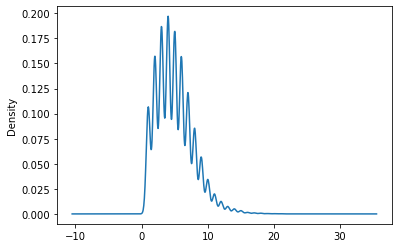

In [19]:
# Visualize the value counts
tweet_time.plot.density()

In [20]:
tweet_time.index

Index(['00:02:21', '00:10:38', '00:01:46', '00:01:30', '00:34:25', '15:30:00',
       '00:00:08', '09:00:02', '00:08:07', '00:15:20',
       ...
       '03:05:47', '04:50:58', '03:40:29', '05:41:01', '06:26:17', '10:13:27',
       '08:58:41', '04:33:35', '05:27:42', '02:31:30'],
      dtype='object', length=69796)

In [21]:
hours

0     34158
11    23096
15    22320
12    21713
9     21437
10    21059
16    20106
13    19653
17    19296
14    19149
1     18623
8     18346
18    15583
19    15575
7     14760
2     11099
6     10161
3      8144
5      7004
4      6647
Name: hour, dtype: int64

In [22]:
hours.sort_index(ascending=True, inplace=True)

In [23]:
hours

0     34158
1     18623
2     11099
3      8144
4      6647
5      7004
6     10161
7     14760
8     18346
9     21437
10    21059
11    23096
12    21713
13    19653
14    19149
15    22320
16    20106
17    19296
18    15583
19    15575
Name: hour, dtype: int64

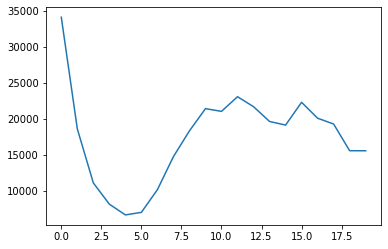

In [24]:
hours.plot()

In [25]:
def cleaned_tweet (row):
    clean_tweet=row["tweet"]
    s = []
    for word in clean_tweet.split():
        if '@' not in word and 'https' not in word and '#' not in word:
            s.append(word)
    return (' ').join(s)


In [26]:
def label_na (row):
    if len(row['cleaned_tweet'].strip())==0: 
        return np.NaN
    else:
        return row["cleaned_tweet"]

In [28]:
biden_3_df["cleaned_tweet"]=biden_3_df.apply (lambda row: cleaned_tweet(row), axis=1)

In [29]:
biden_3_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1319790707977183232,1319713478781800449,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,19160112,buggmudd,Mary Connell,"@KamalaHarris @JoeBiden Shut down travel, sent...",...,0,0,[],[],https://twitter.com/buggmudd/status/1319790707...,0,NaN,"{'user_id': '30354991', 'username': 'KamalaHar...",19,"Shut down travel, sent PPE across the country,..."
1,1319790707213766659,1319765955698774016,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,109722986,comeandtakeit19,⚠️ℕ𝕠𝕣𝕥𝕙𝕖𝕣𝕟 𝕡𝕒𝕥𝕣𝕚𝕠𝕥⚠️,@taylor4arizona @JoeBiden @realDonaldTrump Tru...,...,0,1,[],[],https://twitter.com/Comeandtakeit19/status/131...,0,NaN,"{'user_id': '165743715', 'username': 'taylor4a...",19,Trump 2020
2,1319790707025039362,1319790457560379393,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1304672967360684033,nightmareamor,💀Antonio Nightmare ☠️,@JoeBiden Yes it is. Trump 2020 #Trump2020Land...,...,1,55,['trump2020landslide'],[],https://twitter.com/nightmareamor/status/13197...,1,https://pbs.twimg.com/media/ElDWpwUXEAAqOgx.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}",19,Yes it is. Trump 2020 go to sleepy Jose
3,1319790706425212928,1319781191420203010,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1319660809056866310,johnnylah2,Johnny Lah,@BarackObama @JoeBiden It’s time to start thin...,...,0,0,[],[],https://twitter.com/JohnnyLah2/status/13197907...,0,NaN,"{'user_id': '813286', 'username': 'BarackObama'}",19,It’s time to start thinking about others peopl...
4,1319790704013529088,1319771753774641152,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1220092968327139329,bazinga79132539,Hanna Bates,@kayleighmcenany @realDonaldTrump @JoeBiden 25...,...,0,1,[],[],https://twitter.com/BaZinga79132539/status/131...,0,NaN,"{'user_id': '259001548', 'username': 'kayleigh...",19,25 yrs ago. Times were different.


In [30]:
import re

In [31]:
biden_3_df['cleaned_tweet'] = biden_3_df['cleaned_tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [32]:
biden_3_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1319790707977183232,1319713478781800449,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,19160112,buggmudd,Mary Connell,"@KamalaHarris @JoeBiden Shut down travel, sent...",...,0,0,[],[],https://twitter.com/buggmudd/status/1319790707...,0,NaN,"{'user_id': '30354991', 'username': 'KamalaHar...",19,"Shut down travel, sent PPE across the country,..."
1,1319790707213766659,1319765955698774016,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,109722986,comeandtakeit19,⚠️ℕ𝕠𝕣𝕥𝕙𝕖𝕣𝕟 𝕡𝕒𝕥𝕣𝕚𝕠𝕥⚠️,@taylor4arizona @JoeBiden @realDonaldTrump Tru...,...,0,1,[],[],https://twitter.com/Comeandtakeit19/status/131...,0,NaN,"{'user_id': '165743715', 'username': 'taylor4a...",19,Trump 2020
2,1319790707025039362,1319790457560379393,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1304672967360684033,nightmareamor,💀Antonio Nightmare ☠️,@JoeBiden Yes it is. Trump 2020 #Trump2020Land...,...,1,55,['trump2020landslide'],[],https://twitter.com/nightmareamor/status/13197...,1,https://pbs.twimg.com/media/ElDWpwUXEAAqOgx.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}",19,Yes it is. Trump 2020 go to sleepy Jose
3,1319790706425212928,1319781191420203010,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1319660809056866310,johnnylah2,Johnny Lah,@BarackObama @JoeBiden It’s time to start thin...,...,0,0,[],[],https://twitter.com/JohnnyLah2/status/13197907...,0,NaN,"{'user_id': '813286', 'username': 'BarackObama'}",19,Its time to start thinking about others people...
4,1319790704013529088,1319771753774641152,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1220092968327139329,bazinga79132539,Hanna Bates,@kayleighmcenany @realDonaldTrump @JoeBiden 25...,...,0,1,[],[],https://twitter.com/BaZinga79132539/status/131...,0,NaN,"{'user_id': '259001548', 'username': 'kayleigh...",19,25 yrs ago. Times were different.


In [33]:
len(biden_3_df['cleaned_tweet'][4].strip())

33

In [35]:
import numpy as np

In [36]:
biden_3_df["cleaned_tweet"]=biden_3_df.apply (lambda row: label_na(row), axis=1)

In [37]:
biden_3_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1319790707977183232,1319713478781800449,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,19160112,buggmudd,Mary Connell,"@KamalaHarris @JoeBiden Shut down travel, sent...",...,0,0,[],[],https://twitter.com/buggmudd/status/1319790707...,0,NaN,"{'user_id': '30354991', 'username': 'KamalaHar...",19,"Shut down travel, sent PPE across the country,..."
1,1319790707213766659,1319765955698774016,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,109722986,comeandtakeit19,⚠️ℕ𝕠𝕣𝕥𝕙𝕖𝕣𝕟 𝕡𝕒𝕥𝕣𝕚𝕠𝕥⚠️,@taylor4arizona @JoeBiden @realDonaldTrump Tru...,...,0,1,[],[],https://twitter.com/Comeandtakeit19/status/131...,0,NaN,"{'user_id': '165743715', 'username': 'taylor4a...",19,Trump 2020
2,1319790707025039362,1319790457560379393,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1304672967360684033,nightmareamor,💀Antonio Nightmare ☠️,@JoeBiden Yes it is. Trump 2020 #Trump2020Land...,...,1,55,['trump2020landslide'],[],https://twitter.com/nightmareamor/status/13197...,1,https://pbs.twimg.com/media/ElDWpwUXEAAqOgx.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}",19,Yes it is. Trump 2020 go to sleepy Jose
3,1319790706425212928,1319781191420203010,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1319660809056866310,johnnylah2,Johnny Lah,@BarackObama @JoeBiden It’s time to start thin...,...,0,0,[],[],https://twitter.com/JohnnyLah2/status/13197907...,0,NaN,"{'user_id': '813286', 'username': 'BarackObama'}",19,Its time to start thinking about others people...
4,1319790704013529088,1319771753774641152,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1220092968327139329,bazinga79132539,Hanna Bates,@kayleighmcenany @realDonaldTrump @JoeBiden 25...,...,0,1,[],[],https://twitter.com/BaZinga79132539/status/131...,0,NaN,"{'user_id': '259001548', 'username': 'kayleigh...",19,25 yrs ago. Times were different.


In [38]:
biden_3_df = biden_3_df[biden_3_df['cleaned_tweet'].notna()]

In [39]:
biden_3_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1319790707977183232,1319713478781800449,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,19160112,buggmudd,Mary Connell,"@KamalaHarris @JoeBiden Shut down travel, sent...",...,0,0,[],[],https://twitter.com/buggmudd/status/1319790707...,0,NaN,"{'user_id': '30354991', 'username': 'KamalaHar...",19,"Shut down travel, sent PPE across the country,..."
1,1319790707213766659,1319765955698774016,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,109722986,comeandtakeit19,⚠️ℕ𝕠𝕣𝕥𝕙𝕖𝕣𝕟 𝕡𝕒𝕥𝕣𝕚𝕠𝕥⚠️,@taylor4arizona @JoeBiden @realDonaldTrump Tru...,...,0,1,[],[],https://twitter.com/Comeandtakeit19/status/131...,0,NaN,"{'user_id': '165743715', 'username': 'taylor4a...",19,Trump 2020
2,1319790707025039362,1319790457560379393,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1304672967360684033,nightmareamor,💀Antonio Nightmare ☠️,@JoeBiden Yes it is. Trump 2020 #Trump2020Land...,...,1,55,['trump2020landslide'],[],https://twitter.com/nightmareamor/status/13197...,1,https://pbs.twimg.com/media/ElDWpwUXEAAqOgx.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}",19,Yes it is. Trump 2020 go to sleepy Jose
3,1319790706425212928,1319781191420203010,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1319660809056866310,johnnylah2,Johnny Lah,@BarackObama @JoeBiden It’s time to start thin...,...,0,0,[],[],https://twitter.com/JohnnyLah2/status/13197907...,0,NaN,"{'user_id': '813286', 'username': 'BarackObama'}",19,Its time to start thinking about others people...
4,1319790704013529088,1319771753774641152,2020-10-23 19:59:59 Eastern Daylight Time,2020-10-23,19:59:59,-400,1220092968327139329,bazinga79132539,Hanna Bates,@kayleighmcenany @realDonaldTrump @JoeBiden 25...,...,0,1,[],[],https://twitter.com/BaZinga79132539/status/131...,0,NaN,"{'user_id': '259001548', 'username': 'kayleigh...",19,25 yrs ago. Times were different.


In [40]:
biden_3_df.shape

(316078, 25)

In [ ]:
#CONVERT TO CSV AFTER LUKE LOOKS AT LEN=33